In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


def simple_moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

def decompose_series(series, return_period=1):
  res = sm.tsa.seasonal_decompose(series, period=52)
  fig = res.plot()
  fig.set_figheight(8)
  fig.set_figwidth(15)
  plt.show()


def plot_autocorrelation(series, lags=30):
    plot_acf(series, lags=lags)
    plt.show()

def apply_boxcox_transformation(series):
    transformed_series, lam = boxcox(series)
    return transformed_series, lam



In [49]:
cac40_data = pd.read_csv('CAC.csv', sep=',')
time_series_data = cac40_data['close']

In [50]:
cac40_data = cac40_data.drop(cac40_data.index[-1])
print(cac40_data)


              date      time   close
0       2015-01-02  09:00:00  4291.0
1       2015-01-02  09:00:15  4302.0
2       2015-01-02  09:00:30  4302.0
3       2015-01-02  09:00:45  4300.0
4       2015-01-02  09:01:00  4300.0
...            ...       ...     ...
125823  2015-03-30  09:10:15  5068.0
125824  2015-03-30  09:10:30  5067.0
125825  2015-03-30  09:10:45  5068.0
125826  2015-03-30  09:11:00  5070.0
125827  2015-03-30  09:11:15  5071.0

[125828 rows x 3 columns]


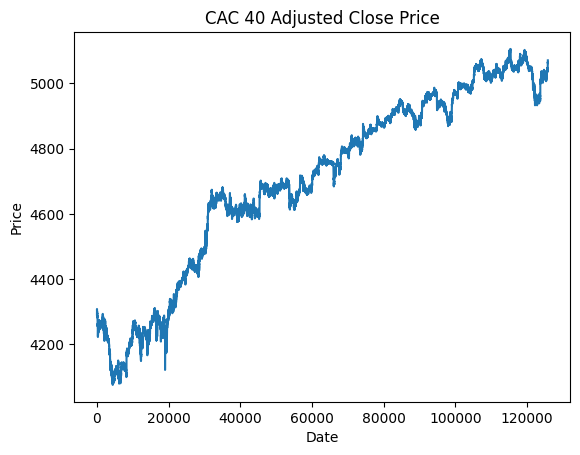

In [51]:
plt.plot(cac40_data["close"])
plt.title('CAC 40 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


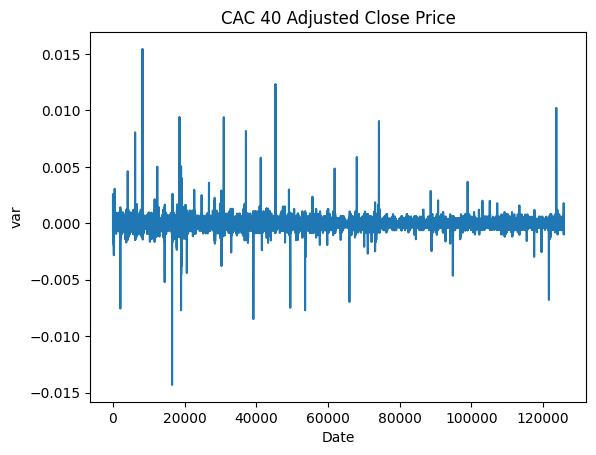

In [52]:
return_period = 1
var = np.log(cac40_data.loc[:, ('close')]).diff(return_period).shift(-return_period)
plt.plot(var)
plt.title('CAC 40 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('var')
plt.show()


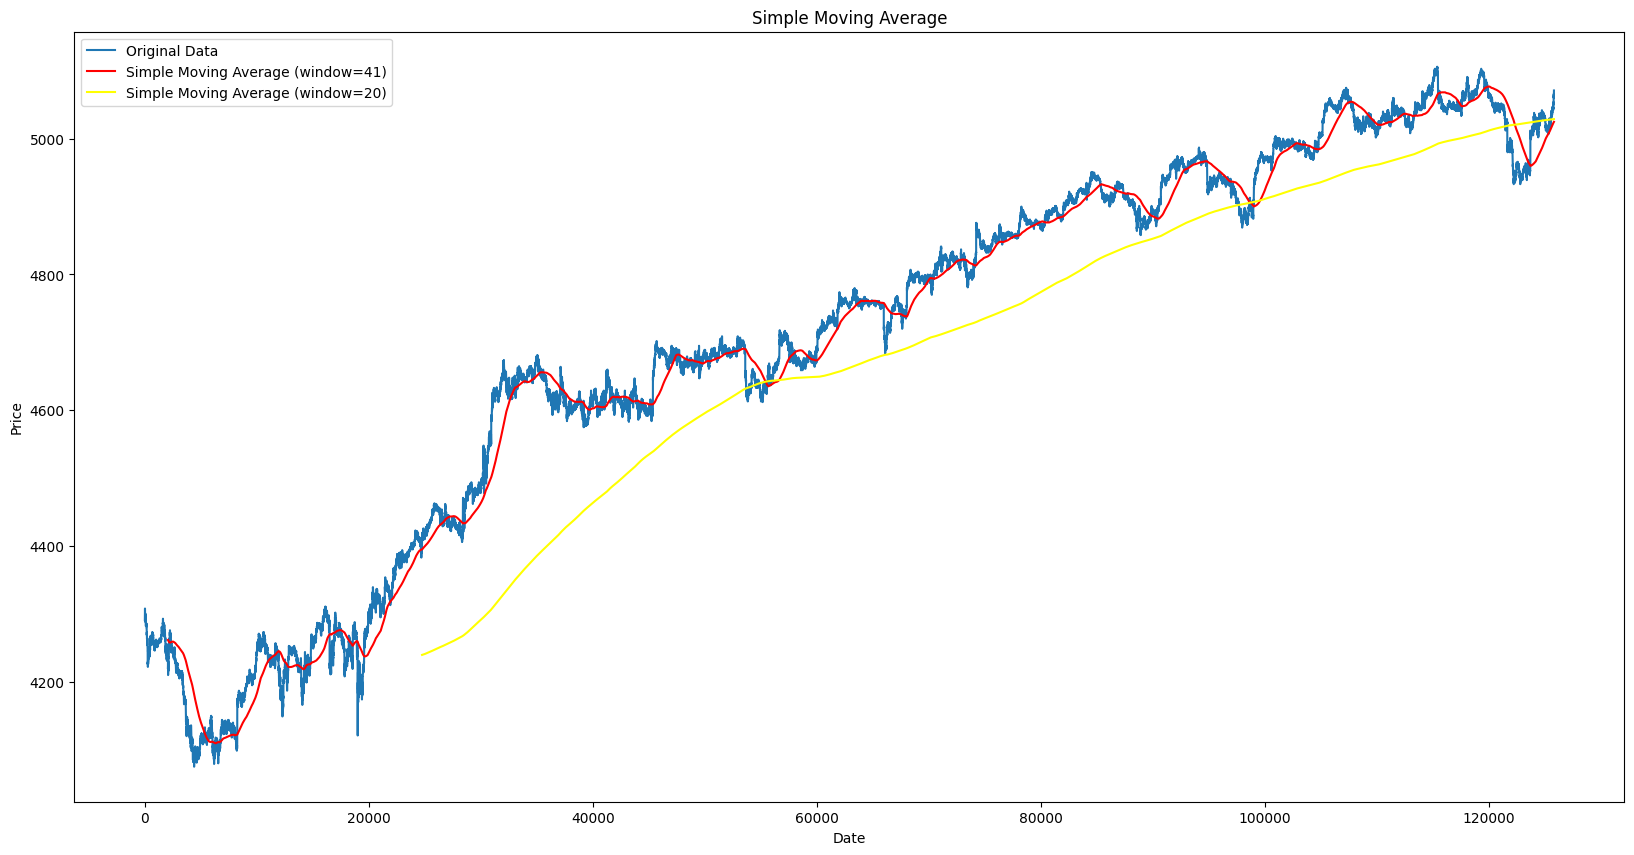

In [99]:
sma12 = simple_moving_average(cac40_data["close"],2063) # jour
sma9600 = simple_moving_average(cac40_data["close"],2063*12) # mois

plt.figure(figsize=(20, 10))
plt.plot(cac40_data["close"], label='Original Data')
plt.plot(sma12, label='Simple Moving Average (window=41)', color='red')
plt.plot(sma9600, label='Simple Moving Average (window=20)', color='yellow')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#DECOMPOSITION JOURS

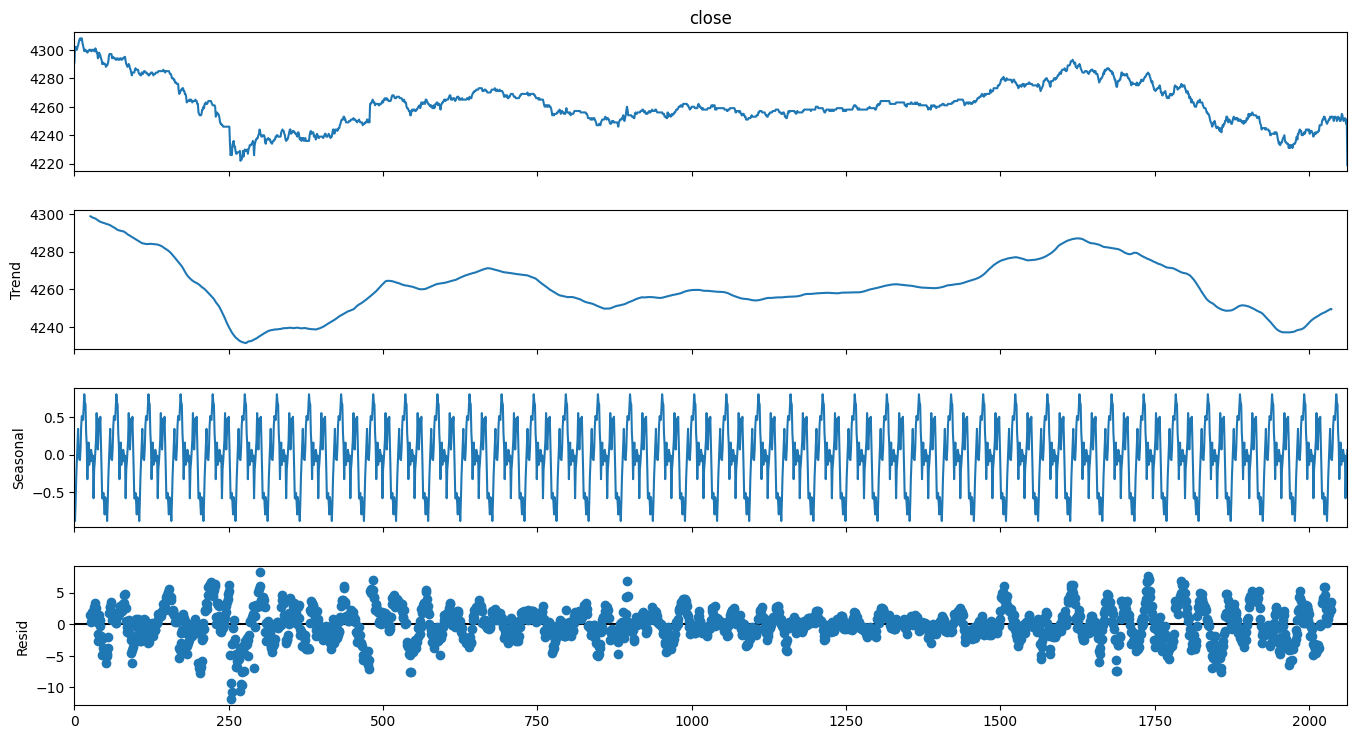

In [100]:
decompose_series(cac40_data["close"][:2063])

#Autocorr jours

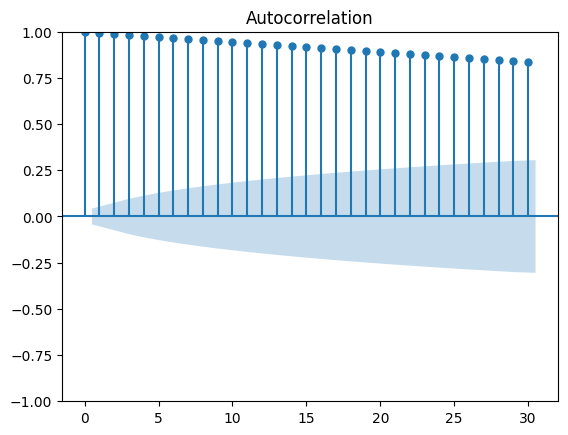

In [101]:
plot_autocorrelation(cac40_data["close"][:2063])

#decompositon semaine



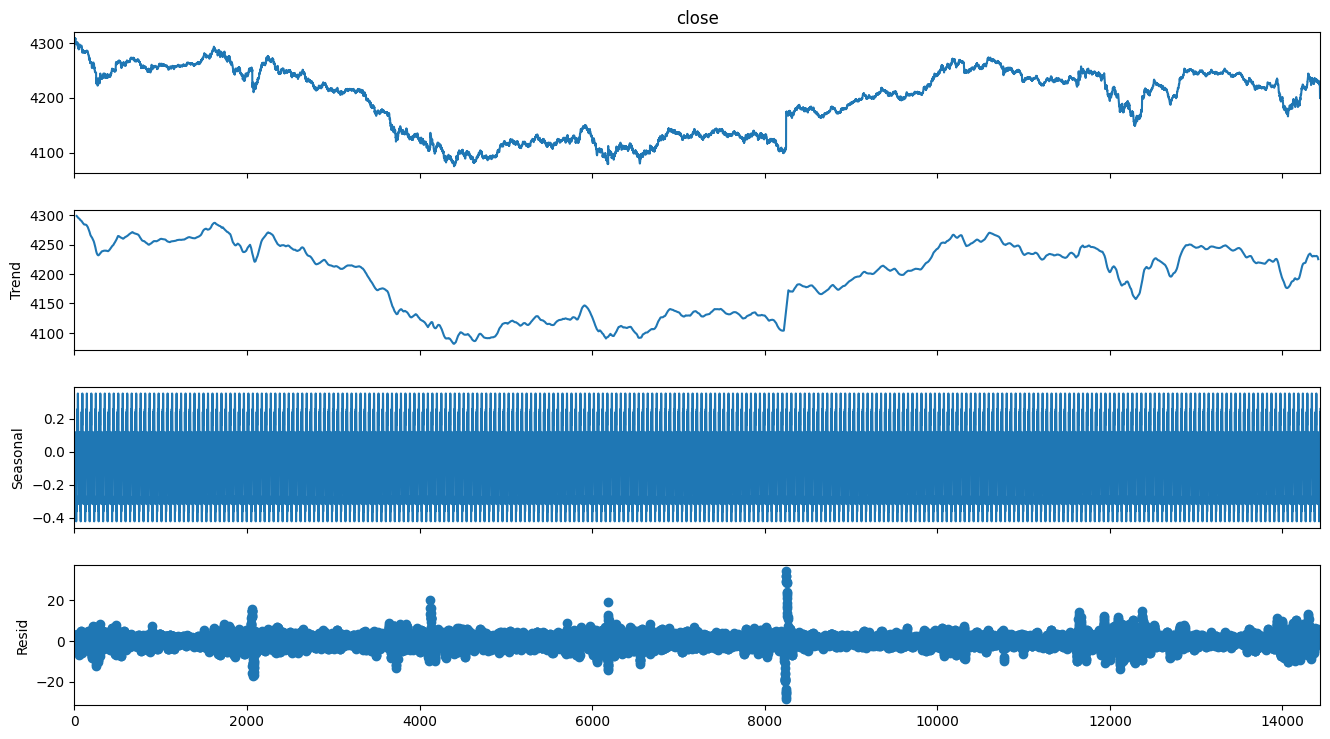

In [67]:
decompose_series(cac40_data["close"][:2063*7])

#AutocorrSemaine

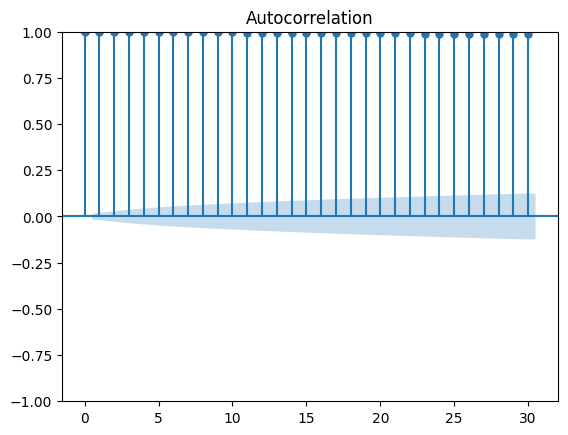

In [68]:
plot_autocorrelation(cac40_data["close"][:2063*7])

#Creation de la base de donnée

In [112]:
import pandas as pd

df1 = pd.read_csv("CAC.csv", usecols=["date", "time", "close"])
df3 = pd.read_csv("USA500.csv", usecols=["date", "time", "Close"])
df4 = pd.read_csv("USATECH.csv", usecols=["date", "time", "Close"])

date_format = "%Y-%m-%d,%H:%M:%S"

df1["datetime"] = pd.to_datetime(df1["date"] + " " + df1["time"])
df3["datetime"] = pd.to_datetime(df3["date"] + " " + df3["time"])
df4["datetime"] = pd.to_datetime(df4["date"] + " " + df4["time"])

result_df = pd.merge(df1, df3, on="datetime", how="outer")
result_df = pd.merge(result_df, df4, on="datetime", how="outer")

result_df = result_df[(result_df["datetime"] >= "2015-01-02 09:00:00") & (result_df["datetime"] <= "2021-03-31 17:35:00")]

result_df = result_df.set_index('datetime').resample('5T').nearest().reset_index()

result_df = result_df.drop(['time_x', 'date_x', 'time_y', 'date_y', 'time', 'date'], axis=1)
print(result_df)



                  datetime   close   Close_x    Close_y
0      2015-01-02 09:00:00  4291.0  2064.900   4252.572
1      2015-01-02 09:05:00  4299.0  2065.100   4253.786
2      2015-01-02 09:10:00  4298.0  2066.400   4256.289
3      2015-01-02 09:15:00  4297.0  2065.100   4253.031
4      2015-01-02 09:20:00  4294.0  2064.900   4253.013
...                    ...     ...       ...        ...
656739 2021-03-31 17:15:00  6073.0  3991.939  13152.059
656740 2021-03-31 17:20:00  6074.0  3991.242  13153.119
656741 2021-03-31 17:25:00  6075.0  3992.436  13159.789
656742 2021-03-31 17:30:00  6068.0  3993.439  13157.269
656743 2021-03-31 17:35:00  6065.0  3991.954  13148.699

[656744 rows x 4 columns]


In [113]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656744 entries, 0 to 656743
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  656744 non-null  datetime64[ns]
 1   close     163238 non-null  float64       
 2   Close_x   654856 non-null  float64       
 3   Close_y   656729 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 20.0 MB


In [115]:
print("Missing Values:", result_df.isnull().sum().any())

Missing Values: False


In [120]:
import numpy as np

var_cac40 = np.log(result_df['close']).diff(return_period).shift(-return_period)
var_usa500 = np.log(result_df['Close_x']).diff(return_period).shift(-return_period)
var_usatech = np.log(result_df['Close_y']).diff(return_period).shift(-return_period)

result_df['var_cac40'] = var_cac40
result_df['var_usa500'] = var_usa500
result_df['var_usatech'] = var_usatech

print(result_df)

                  datetime   close   Close_x    Close_y  var_cac40  \
0      2015-01-02 09:00:00  4291.0  2064.900   4252.572   0.001863   
1      2015-01-02 09:05:00  4299.0  2065.100   4253.786  -0.000233   
2      2015-01-02 09:10:00  4298.0  2066.400   4256.289  -0.000233   
3      2015-01-02 09:15:00  4297.0  2065.100   4253.031  -0.000698   
4      2015-01-02 09:20:00  4294.0  2064.900   4253.013  -0.001865   
...                    ...     ...       ...        ...        ...   
656739 2021-03-31 17:15:00  6073.0  3991.939  13152.059   0.000165   
656740 2021-03-31 17:20:00  6074.0  3991.242  13153.119   0.000165   
656741 2021-03-31 17:25:00  6075.0  3992.436  13159.789  -0.001153   
656742 2021-03-31 17:30:00  6068.0  3993.439  13157.269  -0.000495   
656743 2021-03-31 17:35:00  6065.0  3991.954  13148.699        NaN   

        var_usa500  var_usatech  
0         0.000097     0.000285  
1         0.000629     0.000588  
2        -0.000629    -0.000766  
3        -0.000097    -

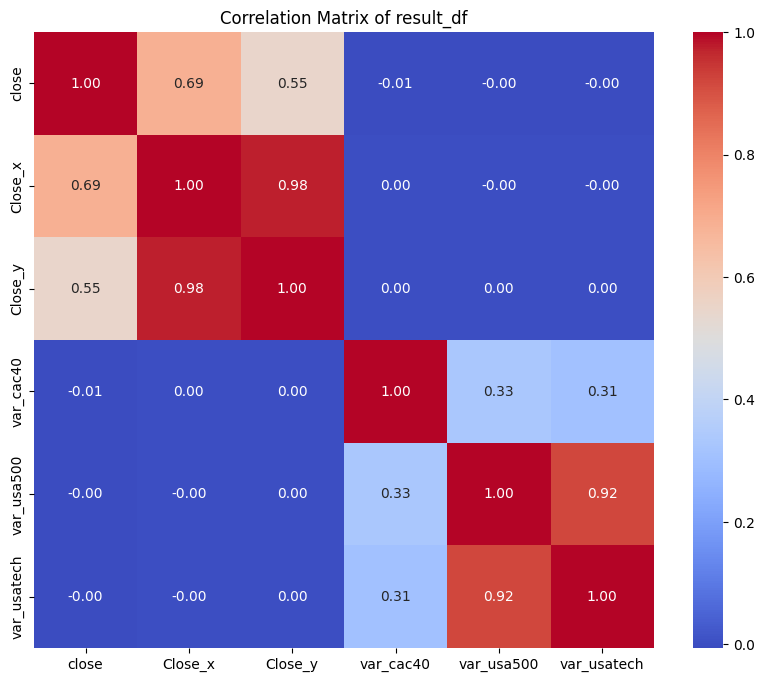

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = result_df.drop('datetime',axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of result_df')
plt.show()


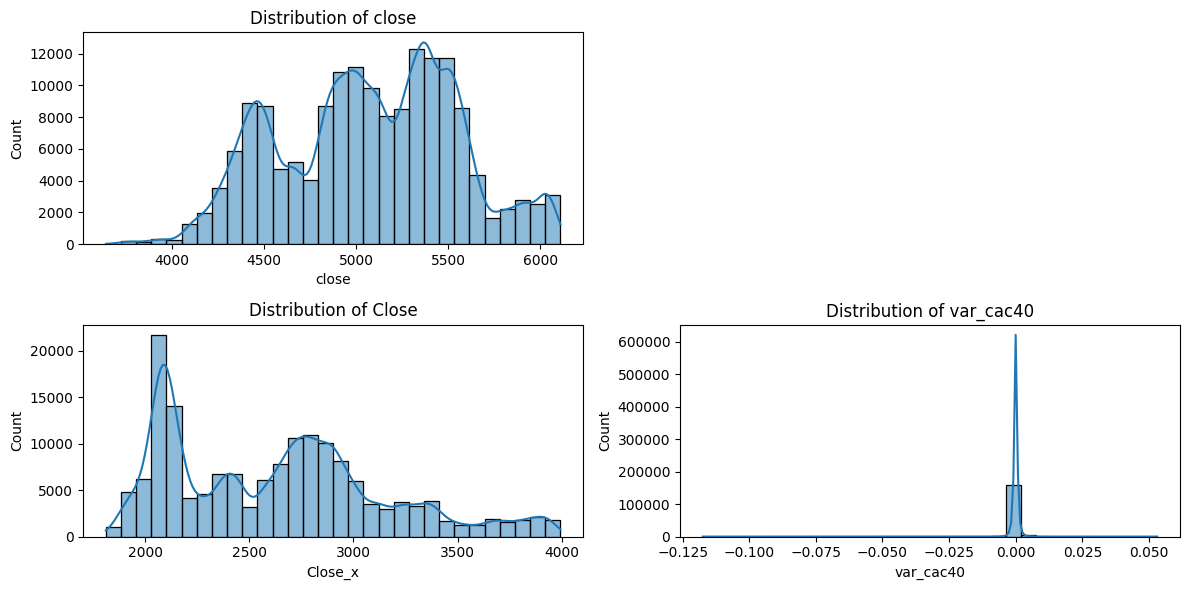

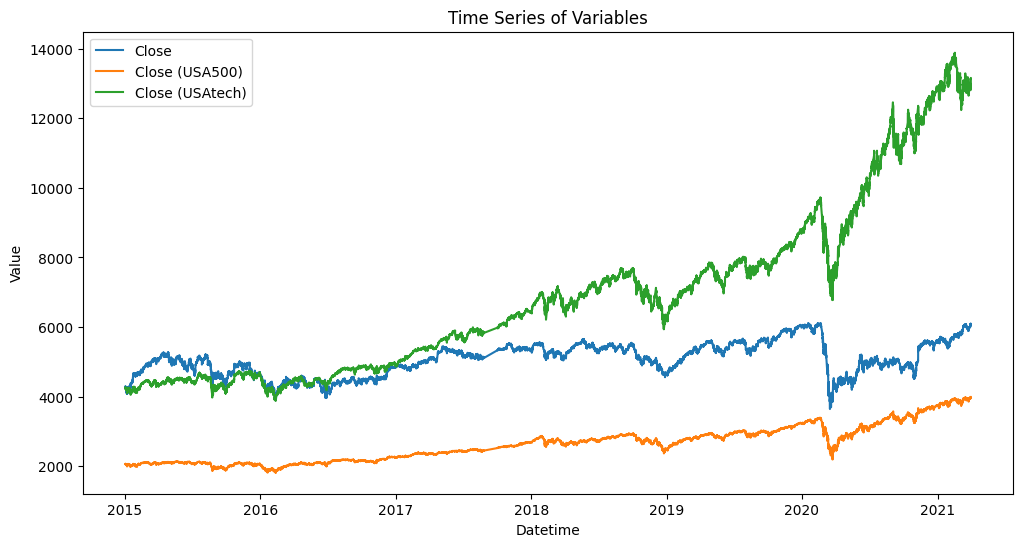

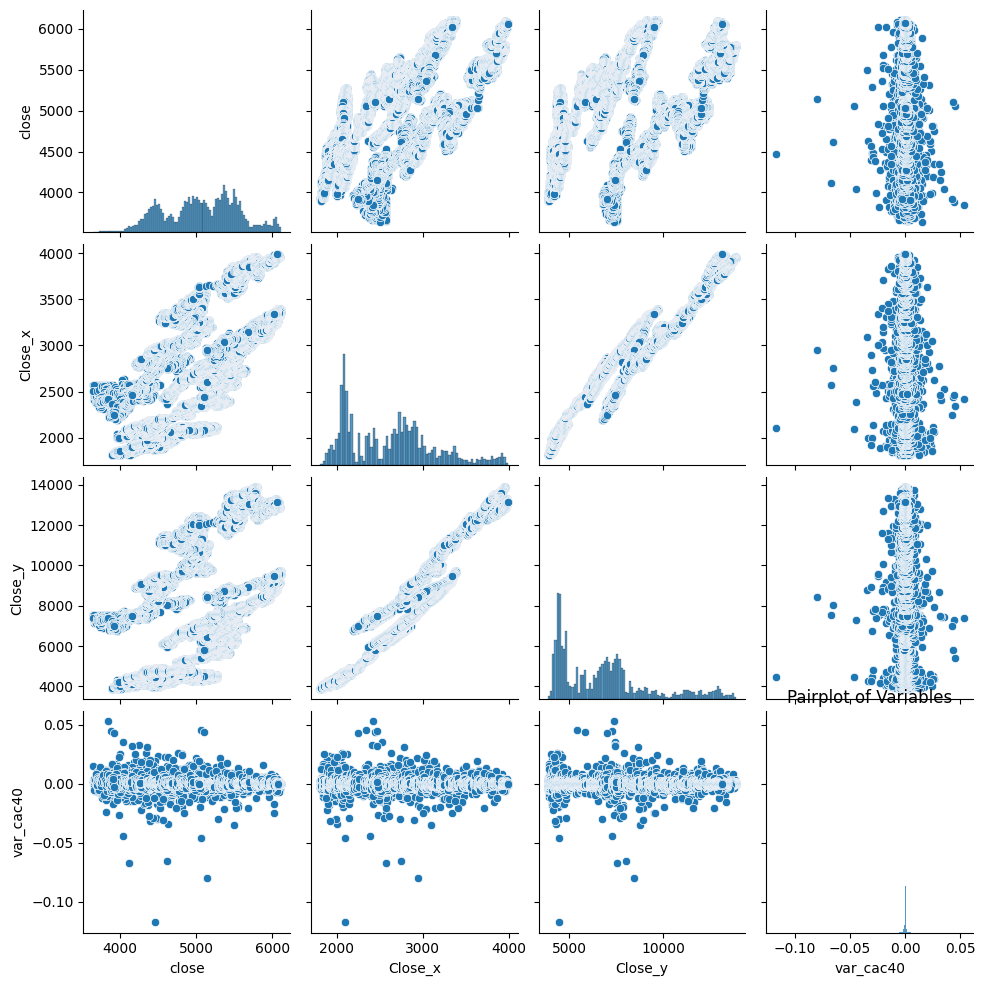


Missing values in the DataFrame:
datetime       0
close          0
Close_x        0
Close_y        0
var_cac40      1
var_usa500     1
var_usatech    1
dtype: int64

Number of duplicated rows in the DataFrame: 0


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(result_df['close'], bins=30, kde=True)
plt.title('Distribution of close')

plt.subplot(2, 2, 3)
sns.histplot(result_df['Close_x'], bins=30, kde=True)
plt.title('Distribution of Close')

plt.subplot(2, 2, 4)
sns.histplot(result_df['var_cac40'], bins=30, kde=True)
plt.title('Distribution of var_cac40')

plt.tight_layout()
plt.show()

# Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(result_df['datetime'], result_df['close'], label='Close')
plt.plot(result_df['datetime'], result_df['Close_x'], label='Close (USA500)')
plt.plot(result_df['datetime'], result_df['Close_y'], label='Close (USAtech)')
plt.title('Time Series of Variables')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.show()

# Multivariate Analysis
sns.pairplot(result_df[['close', 'Close_x', 'Close_y', 'var_cac40']])
plt.title('Pairplot of Variables')
plt.show()

# Check for Missing Values
print("\nMissing values in the DataFrame:")
print(result_df.isnull().sum())

# Check for Duplicated Rows
print("\nNumber of duplicated rows in the DataFrame:", result_df.duplicated().sum())
